In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.distributions.multivariate_normal import MultivariateNormal
from torch.distributions.normal import Normal
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import torch.optim as optim
from torch.autograd import Variable
import numpy.random as rand
import numpy as np
import sys
import os
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


from bnn import BNNBayesbyBackprop, gauss_logpdf
os.getcwd()

'/Users/d_berman/Documents/Tufts_Masters/Semester_3/Bayesian Deep Learning/BDL_final_project'

In [15]:
dataset_size = 5000

X_train = np.empty(shape=(dataset_size, 2), dtype=float)
y_train = np.empty(shape=(dataset_size,), dtype=float)

# make first dimension 0 to effectively make it univariate 
# bc current bnn arch only works with multivariate input
# X_train[:int(dataset_size/2),0] = np.random.normal(loc=0,
#                                                    scale=1,
#                                                    size=(int(dataset_size/2),))
# X_train[:int(dataset_size/2), 1] = np.random.normal(loc=0, 
#                                                     scale=1, 
#                                                     size=(int(dataset_size/2),))

scale = 1

X_train[:int(dataset_size/4), 0] = np.random.uniform(2 * scale, 12 * scale, 
                                                    size=(int(dataset_size/4),))
X_train[:int(dataset_size/4), 1] = np.random.uniform(7.5* scale, 13.5 * scale,
                                                   size=(int(dataset_size/4),))
X_train[int(dataset_size/4):int(dataset_size/2), 0] = np.random.uniform(-9.5 * scale, 0.5 * scale, 
                                                    size=(int(dataset_size/4),))
X_train[int(dataset_size/4):int(dataset_size/2), 1] = np.random.uniform(0.5 * scale, 6.5 * scale,
                                                   size=(int(dataset_size/4),))
y_train[:int(dataset_size/2)] = 0


X_train[int(dataset_size/2):int(3*dataset_size/4),0] = np.random.uniform(2 * scale, 12 * scale,
                                                   size=(int(dataset_size/4),))
X_train[int(dataset_size/2):int(3*dataset_size/4), 1] = np.random.uniform(0.5 * scale, 6.5 * scale,
                                                    size=(int(dataset_size/4),))
X_train[int(3*dataset_size/4):,0] = np.random.uniform(-9.5 * scale, 0.5 * scale,
                                                   size=(int(dataset_size/4),))
X_train[int(3*dataset_size/4):, 1] = np.random.uniform(7.5* scale, 13.5 * scale,
                                                    size=(int(dataset_size/4),))
y_train[int(dataset_size/2):] = 1

# shuffle order
perm = np.random.permutation(dataset_size)
X_train = X_train[perm]
y_train = y_train[perm]

# Shear Transformation:
# A = np.array([[1, 1],
#               [1, 0]])
# X_train = X_train @ A

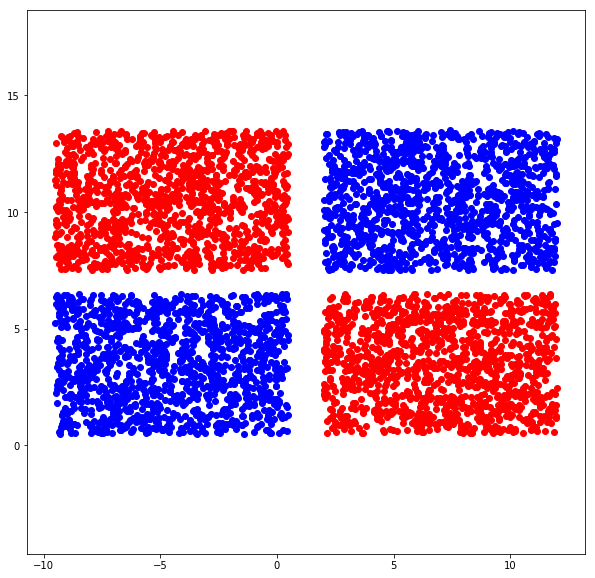

In [16]:
fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(311, projection='3d')       
ax = fig.add_subplot(111)   

# ax.plot_wireframe(X, Y, zs, color='grey', alpha = 0.7)
ax.scatter(X_train[y_train == 0,0], X_train[y_train == 0,1], c='blue')
ax.scatter(X_train[y_train == 1,0], X_train[y_train == 1,1], c='red')
ax.axis('equal')
# ax.set_ylim(-6, 6)
fig.show()

In [37]:
bnn = BNNBayesbyBackprop(prior_mu=0.0, prior_s=1.0, num_MC_samples=100, linear_regression=False, preset=False, classification=True, input_dim=2)
bnn.fit(X_train, y_train, plot=True, n_epochs=120, learning_rate=4e-1, batch_size=1000, weight_classes=False)

Data being saved in following file:
logging.csv
reg:  -2302.5821875
reg:  -2302.5821875
reg:  -2302.5821875
reg:  -2302.5821875
reg:  -2302.5821875
Epoch:  0 	Loss:  -11606.789 	acc:  0.5 	prec:  nan 	rec:  0.0


/Users/d_berman/Documents/Tufts_Masters/Semester_3/Bayesian Deep Learning/BDL_final_project/bnn.py:424: RuntimeWarning: invalid value encountered in true_divide
  precision = true_pos / pred_pos


reg:  -2302.5821875
reg:  -2302.5821875
reg:  -2302.5821875
reg:  -2302.5821875
reg:  -2302.5821875
Epoch:  1 	Loss:  -11659.957 	acc:  0.5 	prec:  nan 	rec:  0.0
reg:  -2302.5821875
reg:  -2302.5821875
reg:  -2302.5821875
reg:  -2302.5821875
reg:  -2302.5821875
Epoch:  2 	Loss:  -11668.293 	acc:  0.5 	prec:  nan 	rec:  0.0
reg:  -2302.5821875
reg:  -2302.5821875
reg:  -2302.5821875
reg:  -2302.5821875
reg:  -2302.5821875
Epoch:  3 	Loss:  -11669.112 	acc:  0.5 	prec:  nan 	rec:  0.0
reg:  -2302.5821875
reg:  -2302.5821875
reg:  -2302.5821875
reg:  -2302.5821875
reg:  -2302.5821875
Epoch:  4 	Loss:  -11671.431 	acc:  0.5 	prec:  nan 	rec:  0.0
reg:  -2302.5821875
reg:  -2302.5821875
reg:  -2302.5821875
reg:  -2302.5821875
reg:  -2302.5821875
Epoch:  5 	Loss:  -11671.914 	acc:  0.5 	prec:  nan 	rec:  0.0
reg:  -2302.5821875
reg:  -2302.5821875
reg:  -2302.5821875
reg:  -2302.5821875
reg:  -2302.5821875
Epoch:  6 	Loss:  -11670.551 	acc:  0.5 	prec:  nan 	rec:  0.0
reg:  -2302.5821875
re

KeyboardInterrupt: 

Text(0.5,0,'output[:,0] (Predicted Means)')

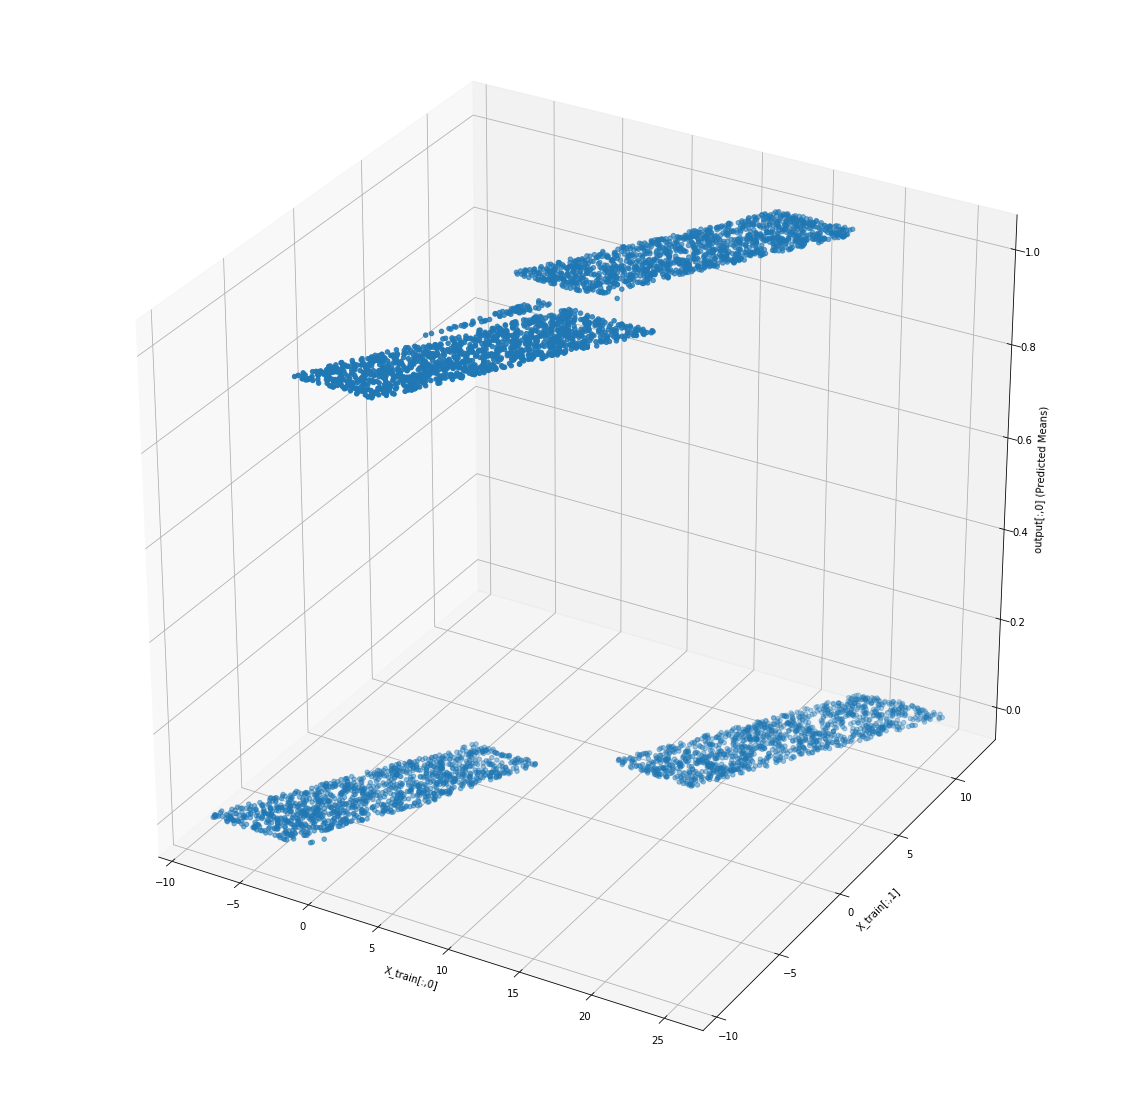

In [14]:
y_preds_c = bnn.model(torch.tensor(X_train, dtype=torch.float), predict=True).detach().numpy()
# homoscedastic_std_devs = np.random.normal(0, np.exp(0.1), X_train_r.shape[0])

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

# sparse_cap = int(len(X_train_r) / 100)

ax.scatter(X_train[:,0], X_train[:,1], y_preds_c)
# ax.scatter(X_train[:,0], X_train[:,1], y_train)
ax.set_xlabel('X_train[:,0]')
ax.set_ylabel('X_train[:,1]')
ax.set_zlabel('output[:,0] (Predicted Means)')